# Image Analysis: Segmenting Objects in the Blue Channel

In this notebook, we'll perform image analysis to segment the nuclei in the blue channel of a fluorescence microscopy image. We'll use the `scikit-image` library for this task.

## Load the Image

First, we'll load the image and extract the blue channel, which represents the nuclei. The image should be saved locally as `hela-cells-8bit.png`.

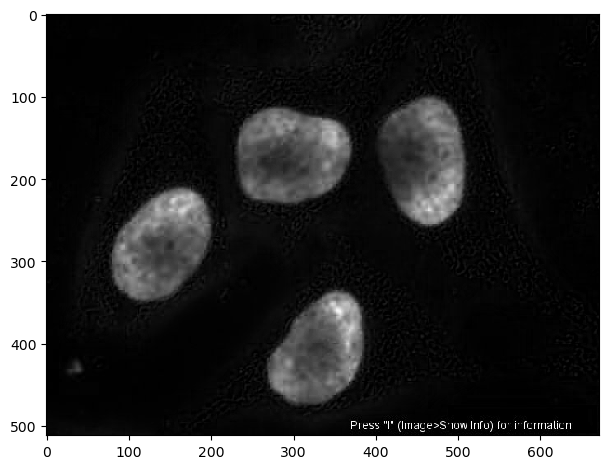

In [1]:
from skimage import io

# Load the image
image = io.imread('hela-cells-8bit.png')
# Extract the blue channel (assuming BGR format)
blue_channel = image[:, :, 2]

# Display the blue channel
io.imshow(blue_channel)
io.show()

## Smooth the Image

To reduce noise, we'll apply a Gaussian blur to the blue channel.

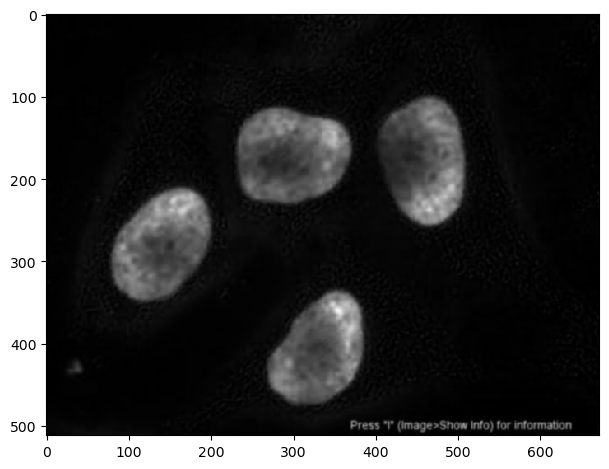

In [2]:
from skimage import filters

# Apply Gaussian blur
blurred = filters.gaussian(blue_channel, sigma=1)

# Display the blurred image
io.imshow(blurred)
io.show()

## Binarize the Image

Use Otsu's thresholding method to convert the blurred image into a binary image.

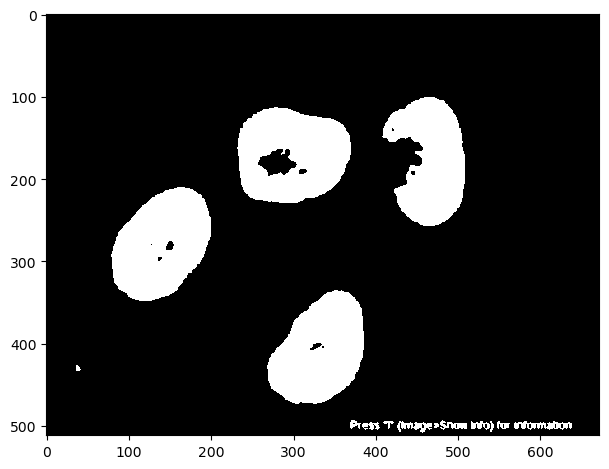

In [3]:
from skimage.filters import threshold_otsu

# Calculate Otsu's threshold
thresh = threshold_otsu(blurred)
# Create a binary image
binary = blurred > thresh

# Display the binary image
io.imshow(binary, cmap='gray')
io.show()

## Label and Visualize the Segments

Here, we'll label the distinct regions in the binary image and overlay contours on the original image.

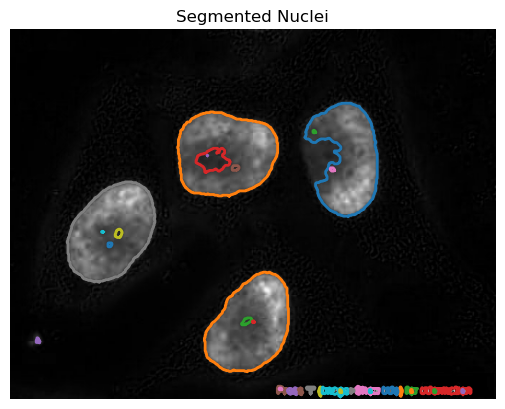

In [4]:
from skimage import measure, color
import matplotlib.pyplot as plt

# Label image regions
label_image = measure.label(binary)
# Find contours
contours = measure.find_contours(binary, 0.8)

# Convert original image to RGB for visualization
image_rgb = color.gray2rgb(blue_channel)

# Visualize the segments
fig, ax = plt.subplots()
ax.imshow(image_rgb, cmap=plt.cm.gray)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax.set_title('Segmented Nuclei')
plt.axis('off')
plt.show()

## Exercise

Try varying the sigma in the Gaussian blur and observe how it affects the segmentation results. Additionally, experiment with different thresholding methods from `skimage.filters` to see how they impact the segmentation.